In [1]:
import pandas as pd 
import datetime as dt
import numpy as np 
import matplotlib.pyplot as plt
import pyodbc

In [2]:
lead_data = pd.read_csv('Results.csv')

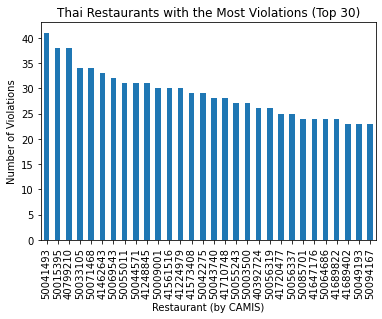

In [3]:
import matplotlib.pyplot as plt

grouped_data = lead_data[lead_data['cuisine_description'] == 'Thai'].groupby('camis')['violation_code']

violation_counts = grouped_data.size()

sorted_data = violation_counts.sort_values(ascending=False).head(30)

sorted_data.plot.bar()

plt.title('Thai Restaurants with the Most Violations (Top 30)')
plt.xlabel('Restaurant (by CAMIS)')
plt.ylabel('Number of Violations')

plt.show()


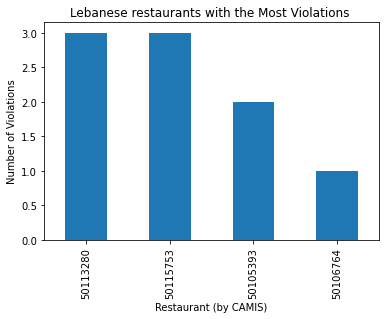

In [4]:
import matplotlib.pyplot as plt

grouped_data = lead_data[lead_data['cuisine_description'] == 'Lebanese'].groupby('camis')['violation_code']

violation_counts = grouped_data.size()

sorted_data = violation_counts.sort_values(ascending=False).head(30)

sorted_data.plot.bar()

plt.title('Lebanese restaurants with the Most Violations ')
plt.xlabel('Restaurant (by CAMIS)')
plt.ylabel('Number of Violations')

plt.show()


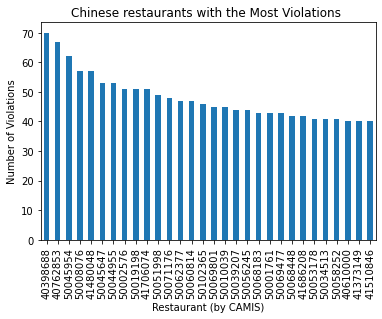

In [5]:
import matplotlib.pyplot as plt

grouped_data = lead_data[lead_data['cuisine_description'] == 'Chinese'].groupby('camis')['violation_code']

violation_counts = grouped_data.size()

sorted_data = violation_counts.sort_values(ascending=False).head(30)

sorted_data.plot.bar()

plt.title('Chinese restaurants with the Most Violations ')
plt.xlabel('Restaurant (by CAMIS)')
plt.ylabel('Number of Violations')

plt.show()


In [6]:
lead_data = lead_data.dropna(axis='rows', how='all')

In [7]:
zip_counts = lead_data["zipcode"].value_counts()

In [8]:
top_20_zip = zip_counts.head(20)

<AxesSubplot:title={'center':'Most Popular Zipcodes for Restaurants'}, xlabel='Zip Code', ylabel='Number of Restaurants'>

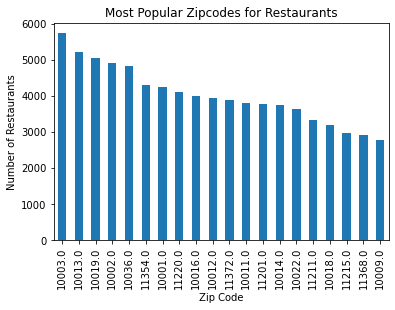

In [9]:
top_20_zip.plot(kind="bar", title="Most Popular Zipcodes for Restaurants", xlabel="Zip Code", ylabel="Number of Restaurants")

In [10]:
bttm_20_zip = zip_counts.tail(20)

<AxesSubplot:title={'center':'Least Popular Zipcodes for Restaurants'}, xlabel='Zip Code', ylabel='Number of Restaurants'>

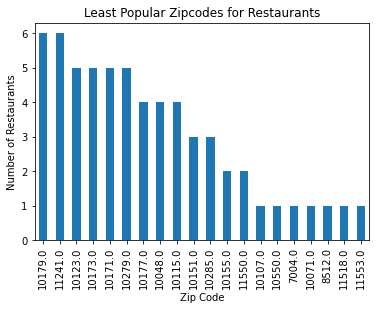

In [11]:
bttm_20_zip.plot(kind="bar", title="Least Popular Zipcodes for Restaurants", xlabel="Zip Code", ylabel="Number of Restaurants")

In [12]:
vio_counts = lead_data["violation_code"].value_counts()

In [13]:
top_20_vio = vio_counts.head(20)

<AxesSubplot:title={'center':'Most Common Violations'}, xlabel='Violation Code', ylabel='Number of times violation occured'>

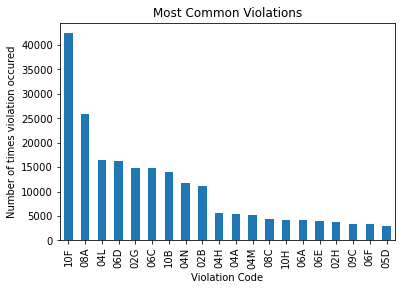

In [14]:
top_20_vio.plot(kind="bar", title="Most Common Violations", xlabel="Violation Code", ylabel="Number of times violation occured")

In [15]:
cuisine_counts = lead_data["cuisine_description"].value_counts()

In [16]:
top_20_cuisine = cuisine_counts.head(20)

<AxesSubplot:title={'center':'Most Common Cuisine'}, xlabel='Cuisine Type', ylabel='Number of restaurants'>

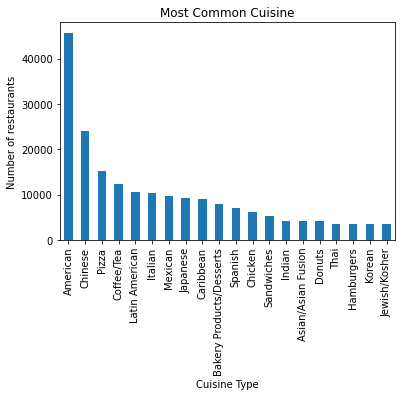

In [17]:
top_20_cuisine.plot(kind="bar", title="Most Common Cuisine", xlabel="Cuisine Type", ylabel="Number of restaurants")

In [18]:
bttm_20_cuisine = cuisine_counts.tail(20)

<AxesSubplot:title={'center':'Least Common Cuisine'}, xlabel='Cuisine Type', ylabel='Number of Restaurants'>

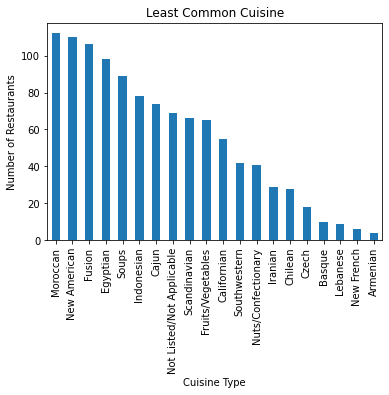

In [19]:
bttm_20_cuisine.plot(kind="bar", title="Least Common Cuisine", xlabel="Cuisine Type", ylabel="Number of Restaurants")

In [20]:
violation_key = lead_data[["violation_code", "violation_description"]].drop_duplicates()

In [21]:
violation_counts = lead_data["violation_description"].value_counts()

In [22]:
top_20_vio = violation_counts.head(20)

In [23]:
print(top_20_vio)

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                        39711
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                     23941
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                                         16159
Evidence of mice or live mice present in facility's food and/or non-food areas.                  

In [24]:
grouped_data = lead_data.groupby('camis')['score'].mean()

In [25]:
print(grouped_data)

camis
30075445    11.666667
30112340    13.250000
30191841    10.400000
40356018     9.250000
40356483    14.545455
              ...    
50127061          NaN
50127064          NaN
50127065          NaN
50127067          NaN
50127068          NaN
Name: score, Length: 27960, dtype: float64


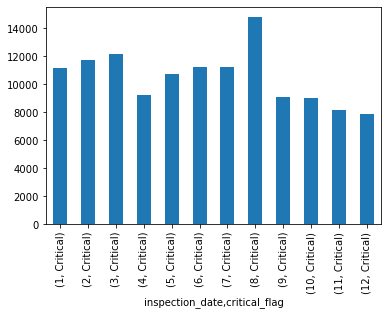

In [26]:
lead_data['inspection_date'] = pd.to_datetime(lead_data['inspection_date'])
critical_violations = lead_data[lead_data['critical_flag'].isin(['Critical'])]
critical_violations = critical_violations.groupby(critical_violations['inspection_date'].dt.month)['critical_flag'].value_counts()
critical_violations.plot(kind='bar')
plt.show()

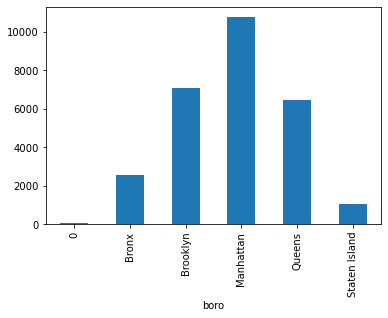

In [27]:
filtered_data = lead_data.drop_duplicates(subset='camis')

grouped_data = filtered_data.groupby('boro')

borough_counts = grouped_data['camis'].size()

borough_counts.plot(kind='bar')
plt.show()


In [28]:
grouped_data = lead_data.groupby('camis')

violation_counts = grouped_data.size().sort_values(ascending=False)

top_20 = violation_counts.head(20)


In [29]:
top_20_df = top_20.reset_index()

merged_df = top_20_df.merge(lead_data, on='camis')

filtered_df = merged_df.drop_duplicates(subset='camis')

print(filtered_df[['zipcode', 'boro', 0]])


      zipcode       boro   0
0     11235.0   Brooklyn  99
99    11358.0     Queens  87
186   11238.0   Brooklyn  83
269   10467.0      Bronx  77
346   11234.0   Brooklyn  70
416   10013.0  Manhattan  67
483   11203.0   Brooklyn  65
548   10013.0  Manhattan  62
610   11372.0     Queens  62
672   10031.0  Manhattan  60
732   11235.0   Brooklyn  59
791   11374.0     Queens  59
850   10001.0  Manhattan  58
908   11220.0   Brooklyn  57
965       NaN     Queens  57
1022  11358.0     Queens  57
1079  10027.0  Manhattan  56
1135  10467.0      Bronx  56
1191  10016.0  Manhattan  55
1246  10468.0      Bronx  55


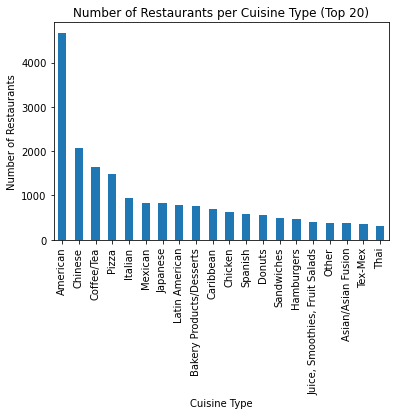

In [30]:
import matplotlib.pyplot as plt

lead_data = lead_data.drop_duplicates(subset='camis', keep='first')

grouped_data = lead_data.groupby('cuisine_description')['camis'].count()

sorted_data = grouped_data.nlargest(20)

sorted_data.plot.bar(rot=90)

plt.title('Number of Restaurants per Cuisine Type (Top 20)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')

plt.show()



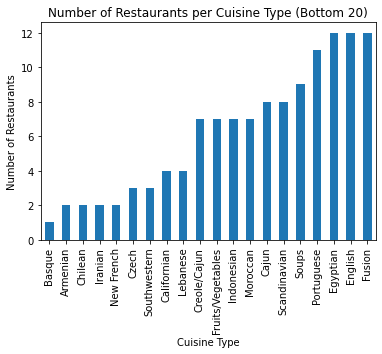

In [31]:
import matplotlib.pyplot as plt
lead_data = lead_data.drop_duplicates(subset='camis', keep='first')

grouped_data = lead_data.groupby('cuisine_description')['camis'].count()

sorted_data = grouped_data.nsmallest(20)

sorted_data.plot.bar(rot=90)

plt.title('Number of Restaurants per Cuisine Type (Bottom 20)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')

plt.show()


In [32]:
lebanese_restaurants = lead_data.loc[lead_data['cuisine_description'] == 'Lebanese']

grades = lebanese_restaurants['grade']

print(grades)


47123     A
63038     N
136025    A
245351    A
Name: grade, dtype: object
